# Assignment 3

The purpose of this assignment is to experiment with various clustering algorithms.

## Imports

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch

## Exploratory Data Analysis

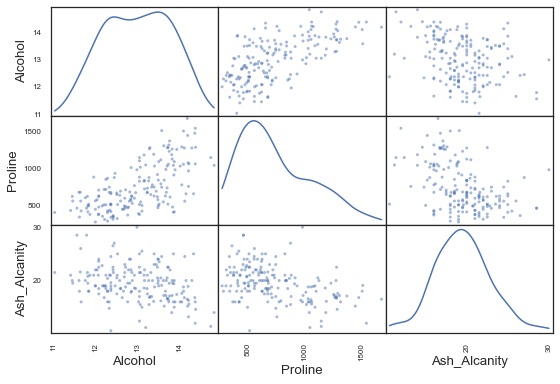

In [383]:
wine = pd.read_csv('../data/wine.csv')

ax = scatter_matrix(wine[['Alcohol', 'Proline', 'Ash_Alcanity']], diagonal='kde')


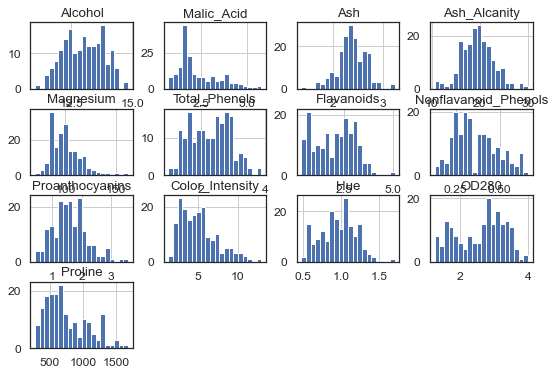

In [384]:
ax = wine.hist(bins=20)

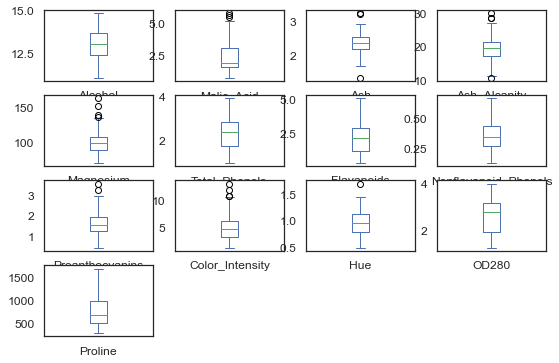

In [385]:
ax = wine.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

## Data Preprocessing

This section preprocessed the data including normalizing the data and using skews

### Normalization

In [386]:
# def min_max(data):
#     result = (data - data.min()) / (data.max() - data.min())
#     return result

# def zscore(data):
#     result = (data - data.mean()) / data.std()
#     return result

# def decimal(data):
#     digits = len(str(abs(data.max())))
#     result = (data / 10**digits)
#     return result

# # Normalize the fields that produce a better skew
# wine.Magnesium = min_max(wine.Magnesium)
# wine.Color_Intensity = min_max(wine.Color_Intensity)

### Skews

In [387]:
# def calc_skew(data):
#     skew = (3 * (np.mean(data) - np.median(data))) / np.std(data)
#     print(skew)

# col = 'Alcohol'

# natlog = np.log(wine[col])
# invsqrt = (1 / np.sqrt(wine[col]))
# sqrt = np.sqrt(wine[col])

# print('Normal Skew:')
# calc_skew(wine[col])
# print('\nNat Log Skew:')
# calc_skew(natlog)
# print('\nInverse Sqrt Skew:')
# calc_skew(invsqrt)
# print('\nSqrt Skew:')
# calc_skew(sqrt)

In [388]:
# # Re-adjust skews
# wine.Ash = np.sqrt(wine.Ash)
# wine.Malic_Acid = (1 / np.sqrt(wine.Malic_Acid))
# wine.Magnesium = np.sqrt(wine.Magnesium)
# wine.Nonflavanoid_Phenols = np.log(wine.Nonflavanoid_Phenols)
# wine.Proanthocyanins = np.sqrt(wine.Proanthocyanins)
# wine.Color_Intensity = np.sqrt(wine.Color_Intensity)
# wine.Proline = np.log(wine.Proline)

# # Normalize the data with min-max that hasn't already been normalized
# wine.Alcohol = min_max(wine.Alcohol)
# wine.Ash = min_max(wine.Ash)
# wine.Ash_Alcanity = min_max(wine.Ash_Alcanity)
# wine.Flavanoids = min_max(wine.Flavanoids)
# wine.Hue = min_max(wine.Hue)
# wine.Malic_Acid = min_max(wine.Malic_Acid)
# wine.Nonflavanoid_Phenols = min_max(wine.Nonflavanoid_Phenols)
# wine.OD280 = min_max(wine.OD280)
# wine.Proanthocyanins = min_max(wine.Proanthocyanins)
# wine.Proline = min_max(wine.Proline)
# wine.Total_Phenols = min_max(wine.Total_Phenols)

# wine

In [389]:
std_scaler = StandardScaler()
wine_cluster = wine.copy()
wine_cluster[wine_cluster.columns] = std_scaler.fit_transform(wine_cluster)
wine_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


Text(0.5, 1.0, 'Data Represented by the Strongest Principal Components')

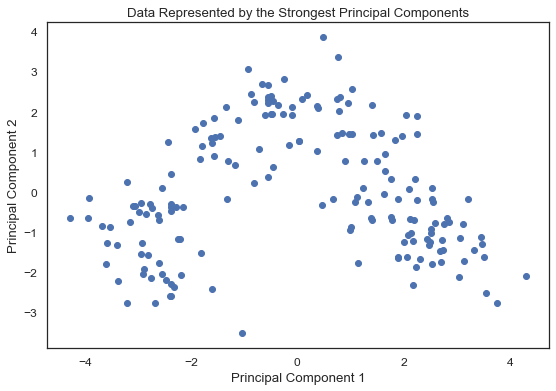

In [390]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wine_cluster)

plt.scatter(x=pca_result[:, 0], y=pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Represented by the Strongest Principal Components')

## Clustering Algorithms

This section contains the experiments ran on the wine dataset with the following clustering algorithms: K-Means, DBSCAN, and BIRCH Clustering.

### K-Means Clustering

In [391]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans_labels = kmeans.fit_predict(wine_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

pd.Series(kmeans_labels).value_counts()

2    65
0    62
1    51
dtype: int64

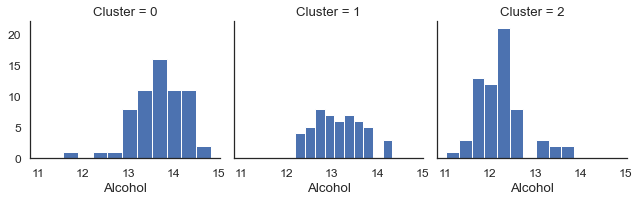

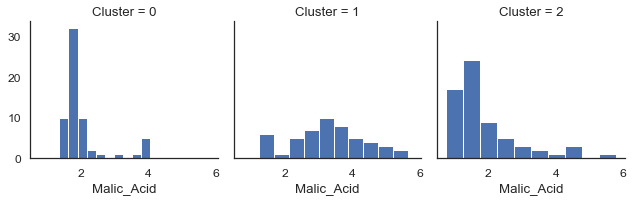

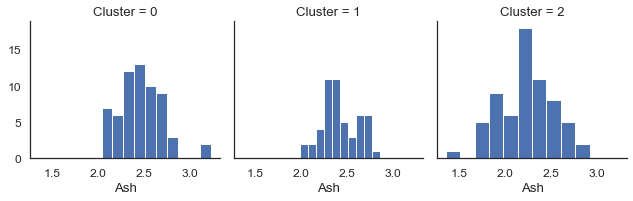

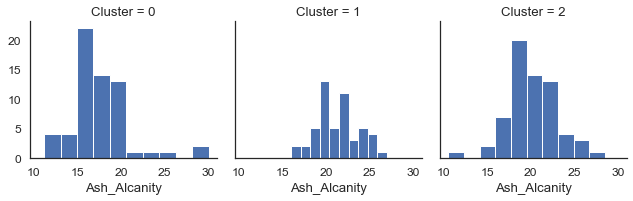

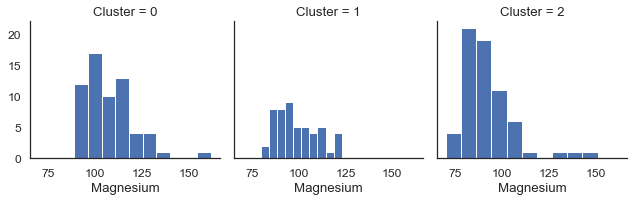

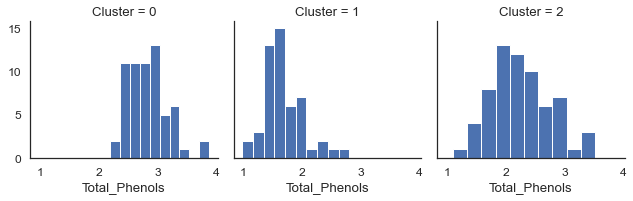

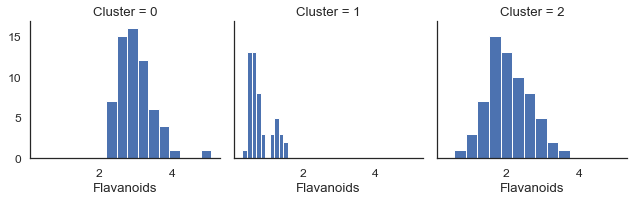

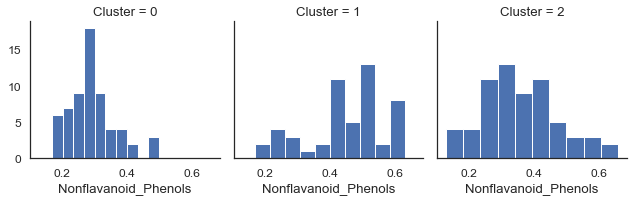

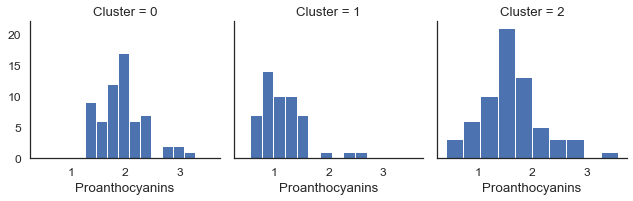

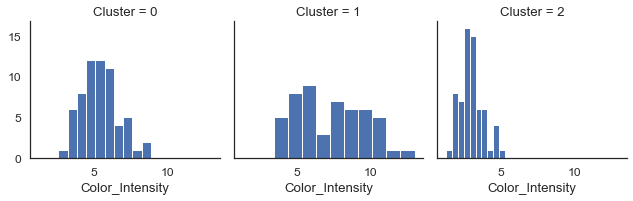

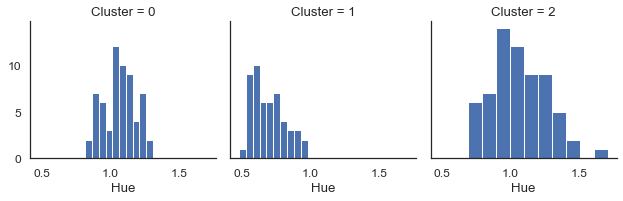

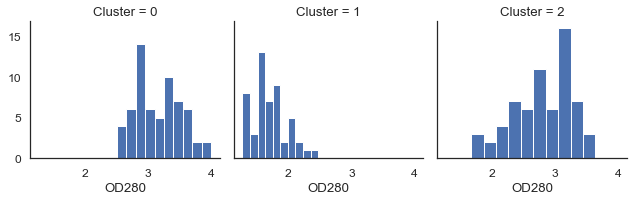

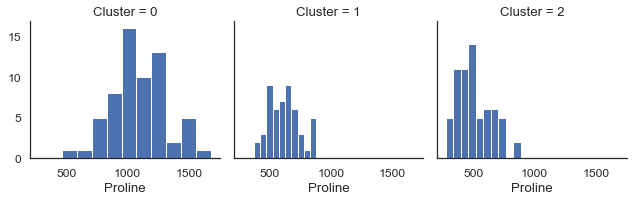

In [392]:
wine_copy = wine.copy()
wine_copy['Cluster'] = kmeans_labels

aux = wine_copy.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(wine_copy, col='Cluster')
    grid.map(plt.hist, cluster)

Text(0.5, 1.0, 'Clustered Data (PCA)')

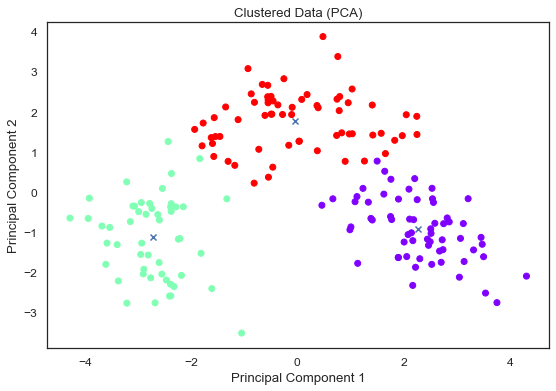

In [403]:
cmap = cm.get_cmap('rainbow')
plt.scatter(x=pca_result[:, 0], y=pca_result[:, 1], c=kmeans_labels, cmap=cmap)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA)')

#### Quality Metrics

In [394]:
print('Silhouette Score:')
print(metrics.silhouette_score(wine_cluster, kmeans.labels_, metric='euclidean'))

Silhouette Score:
0.2848589191898987


### DBSCAN Clustering

In [395]:
dbscan = DBSCAN(eps=2.3, min_samples=4)
dbscan_labels = dbscan.fit_predict(wine_cluster)

pd.Series(dbscan_labels).value_counts()

 0    99
 1    43
-1    36
dtype: int64

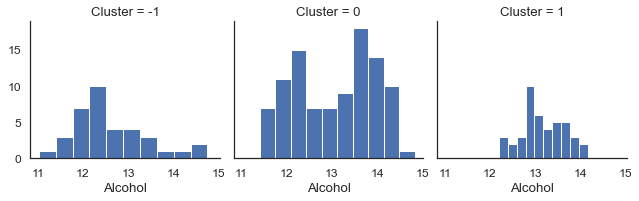

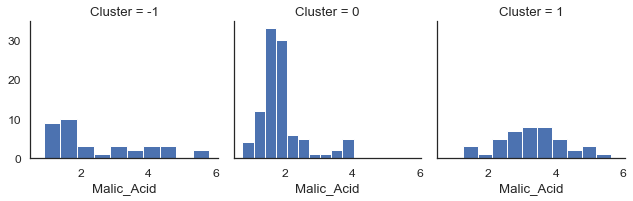

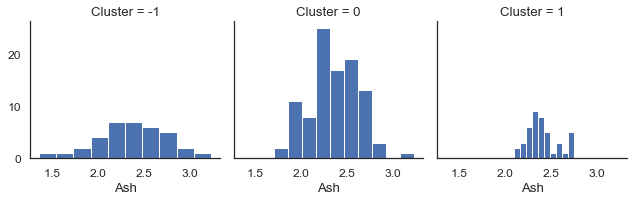

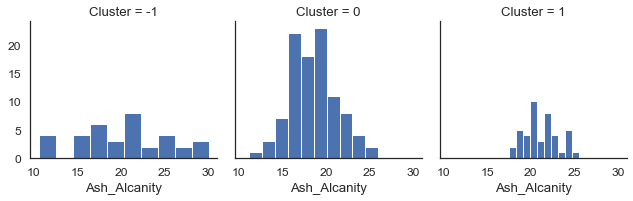

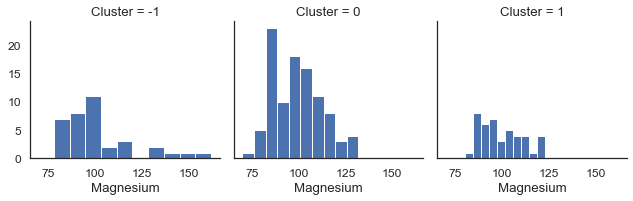

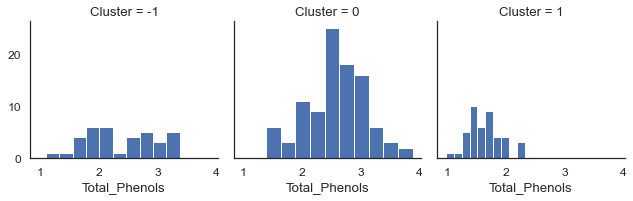

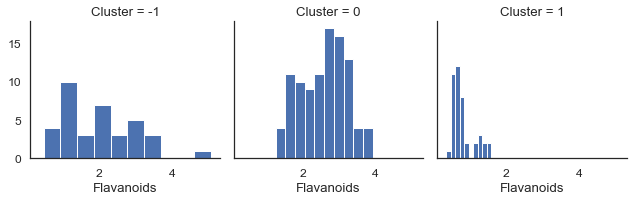

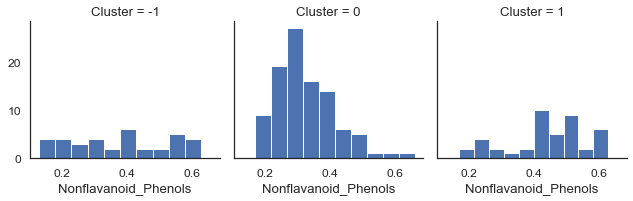

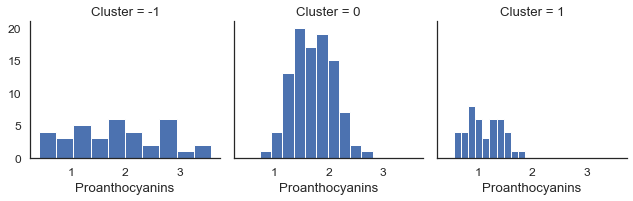

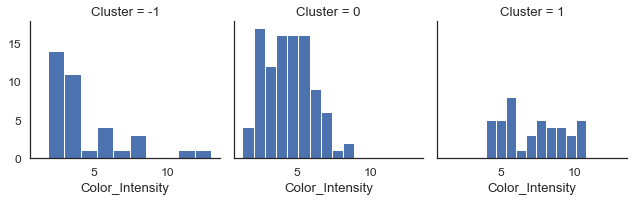

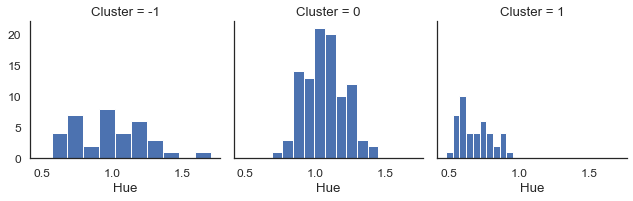

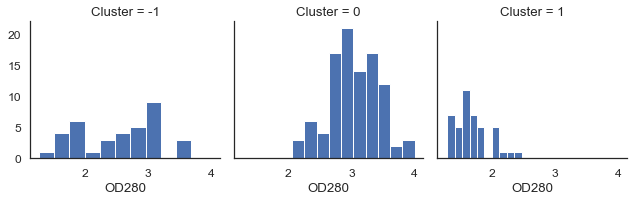

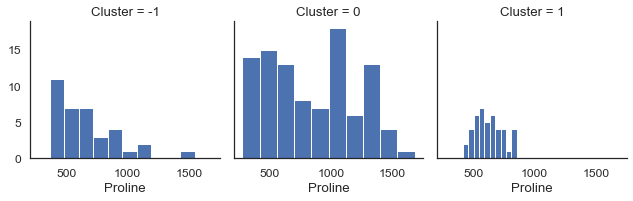

In [396]:
wine_copy = wine.copy()
wine_copy['Cluster'] = dbscan_labels

aux = wine_copy.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(wine_copy, col='Cluster')
    grid.map(plt.hist, cluster)

Text(0.5, 1.0, 'Clustered Data (PCA)')

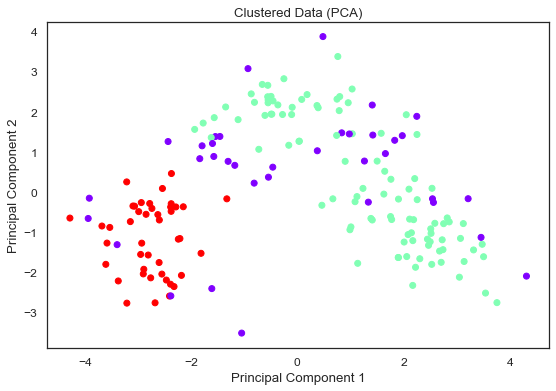

In [404]:
cmap = cm.get_cmap('rainbow')
plt.scatter(x=pca_result[:, 0], y=pca_result[:, 1], c=dbscan_labels, cmap=cmap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA)')

#### Quality Metrics

In [398]:
print('Silhouette Score:')
print(metrics.silhouette_score(wine_cluster, dbscan.labels_, metric='euclidean'))

Silhouette Score:
0.1971962127390583


### BIRCH Clustering

In [399]:
birch = Birch(n_clusters=3, threshold=.7)
birch_labels = birch.fit_predict(wine_cluster)

pd.Series(birch_labels).value_counts()

1    65
2    57
0    56
dtype: int64

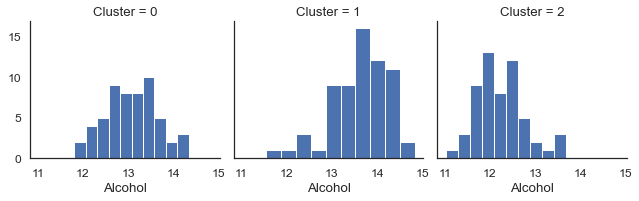

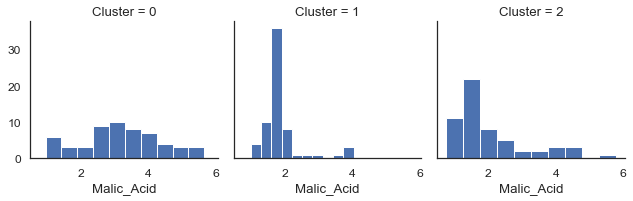

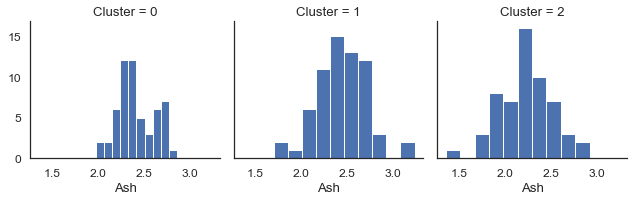

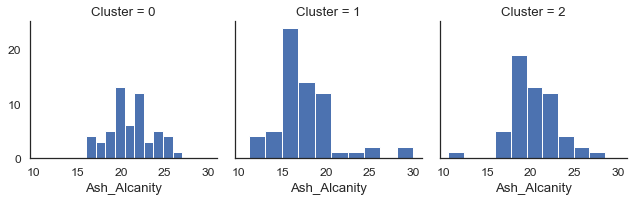

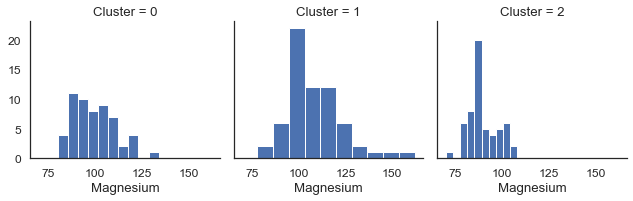

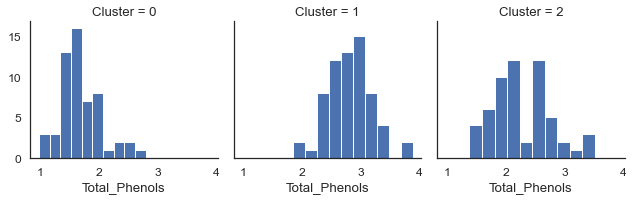

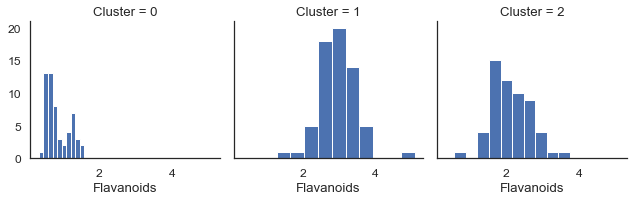

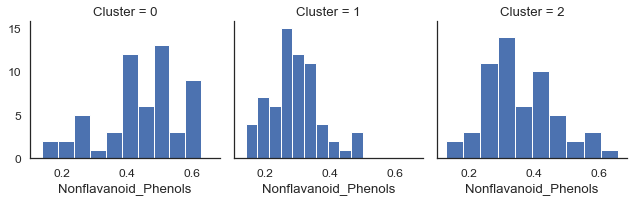

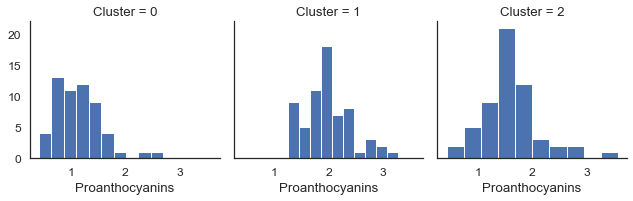

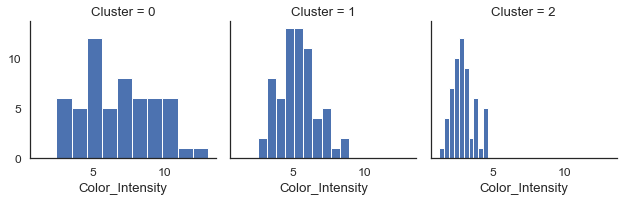

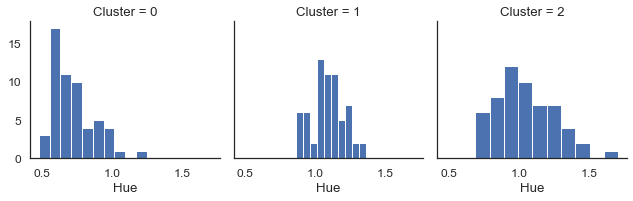

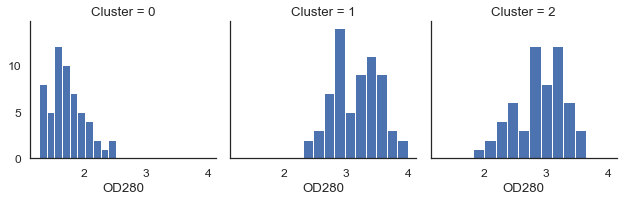

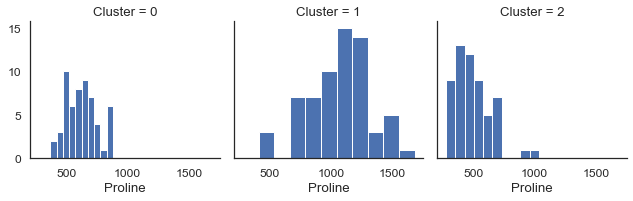

In [400]:
wine_copy = wine.copy()
wine_copy['Cluster'] = birch_labels

aux = wine_copy.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(wine_copy, col='Cluster')
    grid.map(plt.hist, cluster)

Text(0.5, 1.0, 'Clustered Data (PCA)')

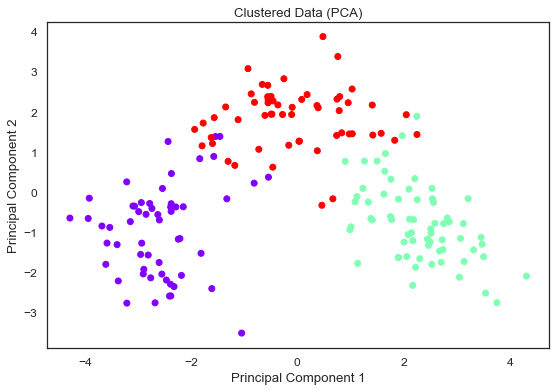

In [405]:
cmap = cm.get_cmap('rainbow')
plt.scatter(x=pca_result[:, 0], y=pca_result[:, 1], c=birch_labels, cmap=cmap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA)')

#### Quality Metrics

In [402]:
print('Silhouette Score:')
print(metrics.silhouette_score(wine_cluster, birch.labels_, metric='euclidean'))

Silhouette Score:
0.27132146689953046
